# Table of contents

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically

%matplotlib inline

In [4]:
# Define path

path = r'C:\Users\opetr\Desktop\PPP Loans'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, '2. Data', '2. Prepared Data', 'clean_data.csv'), index_col = False)

### 2. Data Cleaning

In [6]:
df.shape

(968518, 23)

In [7]:
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatusDate',
       'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'RuralUrbanIndicator', 'BusinessAgeDescription', 'JobsReported',
       'BusinessType', 'OriginatingLenderLocationID', 'OriginatingLender',
       'NonProfit', 'ForgivenessAmount', 'ForgivenessDate'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                       int64
LoanNumber                       int64
DateApproved                    object
ProcessingMethod                object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
LoanStatusDate                  object
LoanStatus                      object
Term                             int64
InitialApprovalAmount          float64
CurrentApprovalAmount          float64
ServicingLenderLocationID        int64
ServicingLenderName             object
RuralUrbanIndicator             object
BusinessAgeDescription          object
JobsReported                   float64
BusinessType                    object
OriginatingLenderLocationID      int64
OriginatingLender               object
NonProfit                       object
ForgivenessAmount              float64
ForgivenessDate                 object
dtype: object

In [9]:
df.head()

,Unnamed: 0,LoanNumber,DateApproved,ProcessingMethod,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,...,ServicingLenderName,RuralUrbanIndicator,BusinessAgeDescription,JobsReported,BusinessType,OriginatingLenderLocationID,OriginatingLender,NonProfit,ForgivenessAmount,ForgivenessDate
0,13,5502308207,2020-08-08,PPP,ANCHORAGE,AK,99503-7146,2021-07-22,Paid in Full,60,...,Northrim Bank,U,Existing or more than 2 years old,385.0,Limited Liability Company(LLC),116975,Northrim Bank,NaN,9615884.57,2021-06-11
1,14,6110847106,2020-04-14,PPP,BARROW,AK,99723,2021-08-21,Paid in Full,24,...,"National Cooperative Bank, National Association",R,Existing or more than 2 years old,295.0,Non-Profit Organization,89628,"National Cooperative Bank, National Association",Y,7761324.81,2021-07-13
2,15,4539098204,2020-08-06,PPP,Anchorage,AK,99502-1130,NaN,Exemption 4,60,...,Idaho First Bank,U,Existing or more than 2 years old,500.0,Corporation,436276,Idaho First Bank,NaN,4891430.37,2022-06-22
3,16,5120868804,2021-04-17,PPP,Anchorage,AK,99518-1105,2022-10-06,Paid in Full,60,...,First National Bank Alaska,U,Existing or more than 2 years old,500.0,501(c)3 – Non Profit,3386,First National Bank Alaska,Y,7321970.55,2022-09-13
4,17,6650277102,2020-04-14,PPP,HOMER,AK,99603,2021-06-09,Paid in Full,24,...,First National Bank Alaska,R,Existing or more than 2 years old,439.0,Corporation,3386,First National Bank Alaska,NaN,6598389.38,2021-05-18


#### Missing Values Check:

In [10]:
# Check for missing values

df.isnull().sum() # No missing values!

Unnamed: 0                          0
LoanNumber                          0
DateApproved                        0
ProcessingMethod                    0
BorrowerCity                        4
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
InitialApprovalAmount               0
CurrentApprovalAmount               0
ServicingLenderLocationID           0
ServicingLenderName                 0
RuralUrbanIndicator                 0
BusinessAgeDescription              1
JobsReported                        1
BusinessType                      719
OriginatingLenderLocationID         0
OriginatingLender                   0
NonProfit                      909179
ForgivenessAmount               29646
ForgivenessDate                 29646
dtype: int64

#### Duplicates Check:

In [11]:
# Find duplicates

df_dups = df[df.duplicated()]

In [12]:
df_dups.shape

(0, 23)

#### Mixed-Type Data:

In [13]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

BorrowerCity
BorrowerZip
LoanStatusDate
BusinessAgeDescription
BusinessType
NonProfit
ForgivenessDate


#### Deriving New Variables Using For-Loops:

##### LoanStatus column

In [14]:
# Find the frequency
df['LoanStatus'].value_counts(dropna = False)

Paid in Full           930837
Exemption 4             37667
Active Un-Disbursed        14
Name: LoanStatus, dtype: int64

In [15]:
# Create a list using a for-loop
result1 = []

for value in df['LoanStatus']:
  if value == 'Paid in Full':
    result1.append("1")
  elif value == 'Exemption 4':
    result1.append("2")
  elif value == 'Active Un-Disbursed':
    result1.append("3")
  else:
    result1.append("Unanswered")

In [16]:
# Check output
result1

['1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [17]:
# Incorporate results in df as a new column
df['LoanStatusNum'] = result1

In [18]:
# Check output
df['LoanStatusNum'].value_counts(dropna = False)

1    930837
2     37667
3        14
Name: LoanStatusNum, dtype: int64

##### RuralUrbanIndicator column

In [19]:
# Find the frequency
df['RuralUrbanIndicator'].value_counts(dropna = False)

U    823886
R    144632
Name: RuralUrbanIndicator, dtype: int64

In [20]:
# Create a list using a for-loop
result2 = []

for value in df['RuralUrbanIndicator']:
  if value == 'R':
    result2.append("1")
  elif value == 'U':
    result2.append("2")
  else:
    result2.append("Unanswered")

In [21]:
# Check output
result2

['2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1'

In [22]:
# Incorporate results in df as a new column
df['RuralUrbanIndicatorNum'] = result2

In [23]:
# Check output
df['RuralUrbanIndicatorNum'].value_counts(dropna = False)

2    823886
1    144632
Name: RuralUrbanIndicatorNum, dtype: int64

##### BusinessAgeDescription Column

In [24]:
# Find the frequency
df['BusinessAgeDescription'].value_counts(dropna = False)

Existing or more than 2 years old         861912
New Business or 2 years or less            54849
Unanswered                                 51044
Change of Ownership                          422
Startup, Loan Funds will Open Business       290
NaN                                            1
Name: BusinessAgeDescription, dtype: int64

In [25]:
# Create a list using a for-loop
result3 = []

for value in df['BusinessAgeDescription']:
  if value == 'Existing or more than 2 years old':
    result3.append("1")
  elif value == 'New Business or 2 years or less':
    result3.append("2")
  elif value == 'Change of Ownership':
    result3.append("3")
  elif value == 'Startup, Loan Funds will Open Business':
    result3.append("4")
  else:
    result3.append("5")

In [26]:
# Check output
result3

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '2',
 '1',
 '1',
 '5',
 '1',
 '5',
 '1',
 '5',
 '1',
 '5',
 '1',
 '1',
 '2',
 '1',
 '5',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '2',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [27]:
# Incorporate results in df as a new column
df['BusinessAgeDescriptionNum'] = result3

In [28]:
# Check output
df['BusinessAgeDescriptionNum'].value_counts(dropna = False)

1    861912
2     54849
5     51045
3       422
4       290
Name: BusinessAgeDescriptionNum, dtype: int64

##### BusinessType Column

In [29]:
# Find the frequency
df['BusinessType'].value_counts(dropna = False)

Corporation                            418339
Limited  Liability Company(LLC)        261304
Subchapter S Corporation               174828
Non-Profit Organization                 55898
Partnership                             18166
Limited Liability Partnership           12728
Sole Proprietorship                     12280
Professional Association                 6279
Cooperative                              2436
501(c)3 – Non Profit                     1767
Non-Profit Childcare Center               900
501(c)6 – Non Profit Membership           762
NaN                                       719
Employee Stock Ownership Plan(ESOP)       643
Self-Employed Individuals                 494
Trust                                     397
Housing Co-op                             152
Joint Venture                             125
Independent Contractors                   112
Single Member LLC                          78
Tribal Concerns                            64
Tenant in Common                  

In [30]:
# Create a list using a for-loop
result4 = []

for value in df['BusinessType']:
  if value == 'Corporation':
    result4.append("1")
  elif value == 'Subchapter S Corporation ':
    result4.append("1")
  elif value == 'Limited  Liability Company(LLC)':
    result4.append("2")   
  elif value == 'Non-Profit Organization':
    result4.append("3")
  elif value == '501(c)3 – Non Profit ':
    result4.append("3")   
  elif value == 'Non-Profit Childcare Center':
    result4.append("3")     
  elif value == '501(c)6 – Non Profit Membership':
    result4.append("3")     
  elif value == '501(c) – Non Profit except 3,4,6,':
    result4.append("3")     
  elif value == '501(c)19 – Non Profit Veterans':
    result4.append("3")     
  elif value == 'Partnership':
    result4.append("4")
  elif value == 'Limited Liability Partnership':
    result4.append("4") 
  else:
    result4.append("5")

In [31]:
# Check output
result4

['2',
 '3',
 '1',
 '5',
 '1',
 '2',
 '5',
 '1',
 '5',
 '1',
 '1',
 '2',
 '2',
 '5',
 '2',
 '5',
 '1',
 '1',
 '2',
 '5',
 '3',
 '5',
 '5',
 '1',
 '5',
 '5',
 '1',
 '2',
 '2',
 '5',
 '2',
 '4',
 '5',
 '2',
 '1',
 '5',
 '3',
 '2',
 '5',
 '1',
 '1',
 '5',
 '5',
 '5',
 '2',
 '5',
 '1',
 '1',
 '5',
 '5',
 '3',
 '3',
 '5',
 '2',
 '1',
 '3',
 '2',
 '1',
 '1',
 '5',
 '2',
 '1',
 '1',
 '5',
 '1',
 '5',
 '1',
 '5',
 '2',
 '2',
 '5',
 '3',
 '1',
 '1',
 '2',
 '2',
 '5',
 '2',
 '1',
 '5',
 '3',
 '1',
 '2',
 '3',
 '3',
 '5',
 '5',
 '1',
 '3',
 '2',
 '2',
 '1',
 '5',
 '2',
 '5',
 '1',
 '5',
 '5',
 '1',
 '1',
 '3',
 '5',
 '1',
 '5',
 '1',
 '2',
 '1',
 '1',
 '1',
 '5',
 '1',
 '1',
 '3',
 '1',
 '3',
 '1',
 '5',
 '2',
 '3',
 '1',
 '1',
 '5',
 '1',
 '2',
 '1',
 '3',
 '3',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '3',
 '1',
 '3',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '5',
 '1',
 '3',
 '2',
 '5',
 '2',
 '1',
 '1',
 '2',
 '5',
 '2',
 '2',
 '2',
 '1',
 '5',
 '3',
 '3',
 '2',
 '2',
 '1',
 '1'

In [32]:
# Incorporate results in df as a new column
df['BusinessTypeNum'] = result4

In [33]:
# Check output
df['BusinessTypeNum'].value_counts(dropna = False)

1    418339
2    261304
5    200409
3     57572
4     30894
Name: BusinessTypeNum, dtype: int64

##### NonProfit Column

In [34]:
# Find the frequency
df['NonProfit'].value_counts(dropna = False)

NaN    909179
Y       59339
Name: NonProfit, dtype: int64

In [35]:
# Create a list using a for-loop
result5 = []

for value in df['NonProfit']:
  if value == 'Y':
    result5.append("1")
  else:
    result5.append("2")

In [36]:
# Check output
result5

['2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2'

In [37]:
# Incorporate results in df as a new column
df['NonProfitNum'] = result5

In [38]:
# Check output
df['NonProfitNum'].value_counts(dropna = False)

2    909179
1     59339
Name: NonProfitNum, dtype: int64

#### Change the data type of the newly derived variables:

In [39]:
df['LoanStatusNum'] = df['LoanStatusNum'].astype('int64')
df['RuralUrbanIndicatorNum'] = df['RuralUrbanIndicatorNum'].astype('int64')
df['LoanStatusNum'] = df['LoanStatusNum'].astype('int64')
df['BusinessTypeNum'] = df['BusinessTypeNum'].astype('int64')
df['NonProfitNum'] = df['NonProfitNum'].astype('int64')

In [40]:
# Check output
df.dtypes

Unnamed: 0                       int64
LoanNumber                       int64
DateApproved                    object
ProcessingMethod                object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
LoanStatusDate                  object
LoanStatus                      object
Term                             int64
InitialApprovalAmount          float64
CurrentApprovalAmount          float64
ServicingLenderLocationID        int64
ServicingLenderName             object
RuralUrbanIndicator             object
BusinessAgeDescription          object
JobsReported                   float64
BusinessType                    object
OriginatingLenderLocationID      int64
OriginatingLender               object
NonProfit                       object
ForgivenessAmount              float64
ForgivenessDate                 object
LoanStatusNum                    int64
RuralUrbanIndicatorNum           int64
BusinessAgeDescriptionNum

### 3. Exploring Relationships

### Correlations:

In [41]:
# Create a correlation matrix using pandas

df.corr()

,Unnamed: 0,LoanNumber,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderLocationID,JobsReported,OriginatingLenderLocationID,ForgivenessAmount,LoanStatusNum,RuralUrbanIndicatorNum,BusinessTypeNum,NonProfitNum
Unnamed: 0,1.000000,0.010014,-0.001094,-0.022045,-0.021753,0.000963,-0.018006,-0.002005,-0.021474,-0.035790,-0.106969,0.026617,-0.003145
LoanNumber,0.010014,1.000000,-0.067018,0.008857,0.009205,-0.004347,-0.010423,-0.003294,0.008984,-0.003989,-0.014389,0.001304,-0.011534
Term,-0.001094,-0.067018,1.000000,-0.067939,-0.066833,0.061758,-0.075992,0.046917,-0.070918,0.094630,0.020208,-0.014828,0.014868
InitialApprovalAmount,-0.022045,0.008857,-0.067939,1.000000,0.990092,-0.013633,0.751817,-0.013134,0.984911,-0.000254,0.022582,0.025156,-0.064262
CurrentApprovalAmount,-0.021753,0.009205,-0.066833,0.990092,1.000000,-0.015397,0.753827,-0.015000,0.994529,0.000236,0.022305,0.025104,-0.064158
ServicingLenderLocationID,0.000963,-0.004347,0.061758,-0.013633,-0.015397,1.000000,-0.020218,0.965448,-0.012377,0.082801,0.058563,0.006477,0.003757
JobsReported,-0.018006,-0.010423,-0.075992,0.751817,0.753827,-0.020218,1.000000,-0.019540,0.752450,-0.007781,-0.003308,0.027086,-0.106869
OriginatingLenderLocationID,-0.002005,-0.003294,0.046917,-0.013134,-0.015000,0.965448,-0.019540,1.000000,-0.011971,0.082838,0.058290,0.017669,0.004969
ForgivenessAmount,-0.021474,0.008984,-0.070918,0.984911,0.994529,-0.012377,0.752450,-0.011971,1.000000,-0.009693,0.021826,0.026664,-0.063495
LoanStatusNum,-0.035790,-0.003989,0.094630,-0.000254,0.000236,0.082801,-0.007781,0.082838,-0.009693,1.000000,0.046432,-0.013057,0.028516


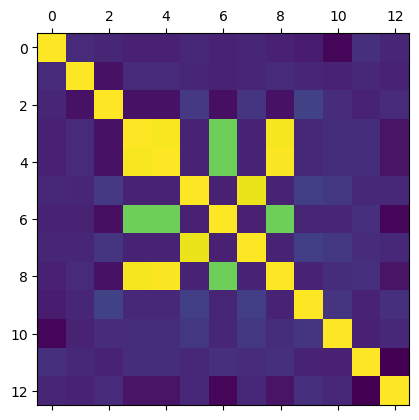

In [42]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

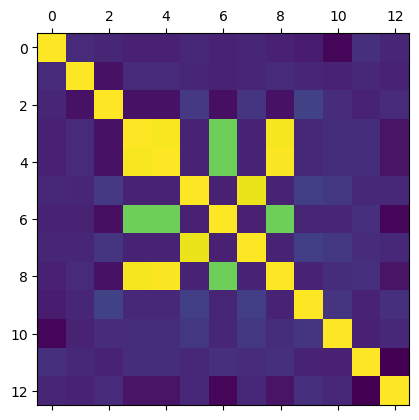

In [43]:
# Save figure
plt.matshow(df.corr())
plt.savefig("heatmap.png") 

In [44]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\opetr\\Desktop\\PPP Loans\\3. Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

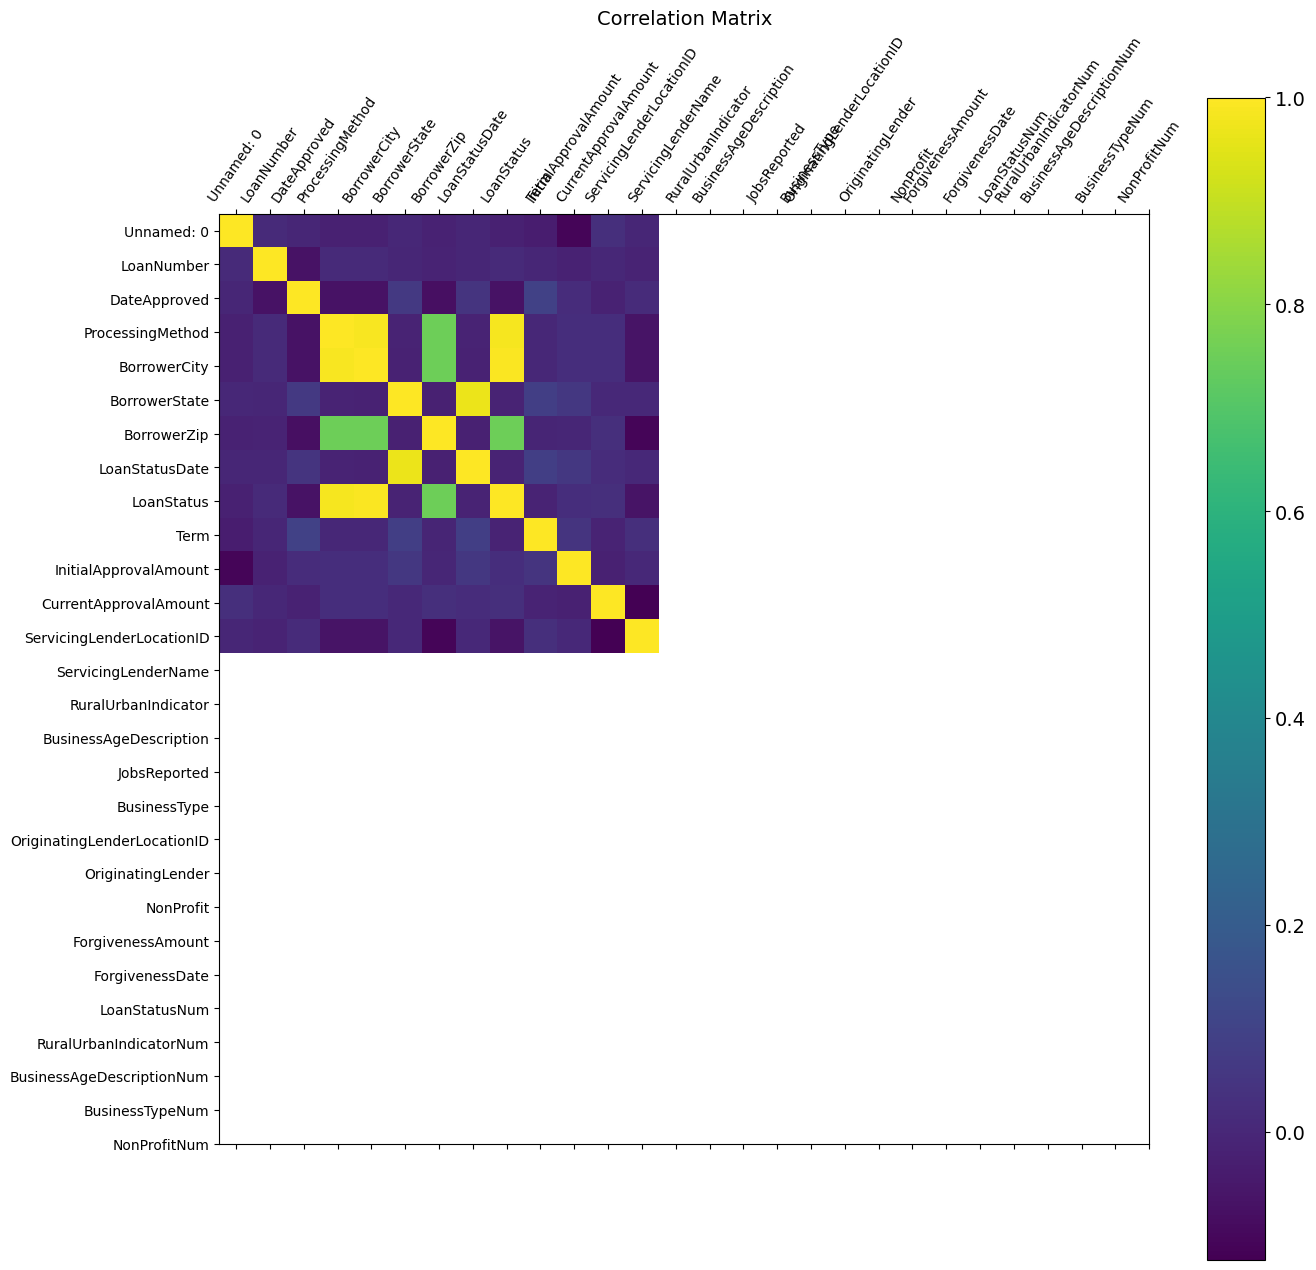

In [45]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(15, 15)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=55) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [46]:
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatusDate',
       'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'RuralUrbanIndicator', 'BusinessAgeDescription', 'JobsReported',
       'BusinessType', 'OriginatingLenderLocationID', 'OriginatingLender',
       'NonProfit', 'ForgivenessAmount', 'ForgivenessDate', 'LoanStatusNum',
       'RuralUrbanIndicatorNum', 'BusinessAgeDescriptionNum',
       'BusinessTypeNum', 'NonProfitNum'],
      dtype='object')

In [47]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['BusinessTypeNum', 'BusinessAgeDescriptionNum', 'NonProfitNum', 'RuralUrbanIndicatorNum', 'JobsReported', 
        'ServicingLenderLocationID', 'OriginatingLenderLocationID', 'Term', 'InitialApprovalAmount', 
        'CurrentApprovalAmount', 'ForgivenessAmount', 'LoanStatusNum']]

In [48]:
sub

,BusinessTypeNum,BusinessAgeDescriptionNum,NonProfitNum,RuralUrbanIndicatorNum,JobsReported,ServicingLenderLocationID,OriginatingLenderLocationID,Term,InitialApprovalAmount,CurrentApprovalAmount,ForgivenessAmount,LoanStatusNum
0,2,1,2,2,385.0,116975,116975,60,9571397.00,9538531.00,9615884.57,1
1,3,1,1,1,295.0,89628,89628,24,7666768.00,7666768.00,7761324.81,1
2,1,1,2,2,500.0,436276,436276,60,7398947.89,7398947.89,4891430.37,2
3,5,1,1,2,500.0,3386,3386,60,7223025.00,7223025.00,7321970.55,1
4,1,1,2,1,439.0,3386,3386,24,6528631.40,6528631.40,6598389.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
968513,1,1,2,2,15.0,42366,42366,24,150000.00,150000.00,151037.50,1
968514,3,1,1,2,42.0,122813,122813,24,150000.00,150000.00,150789.04,1
968515,5,1,2,2,5.0,77189,77189,60,150000.00,150000.00,150743.84,1
968516,1,2,2,1,7.0,25901,25901,60,150000.00,150000.00,152820.83,1


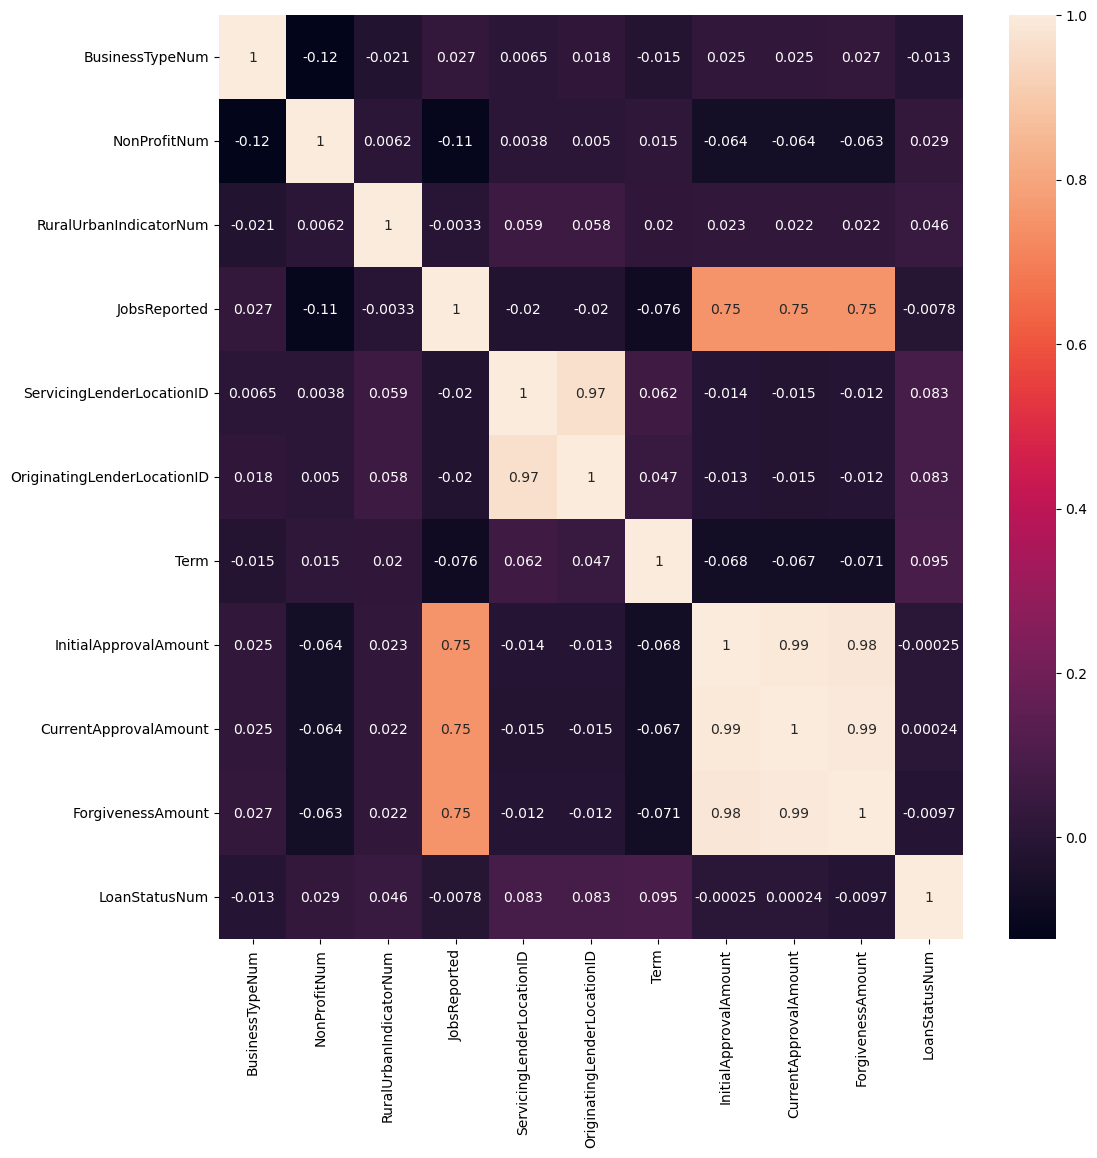

In [49]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap

### Scatterplots:

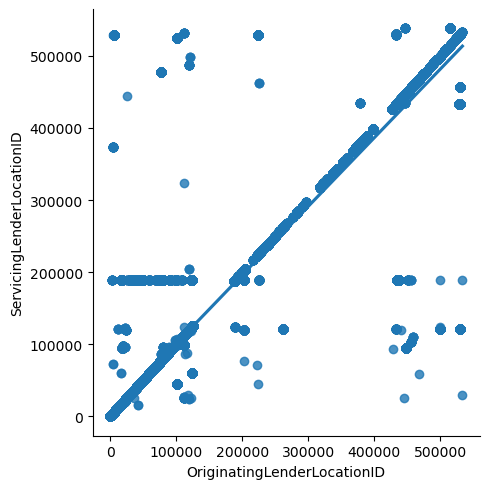

In [50]:
# Create a scatterplot for the "OriginatingLenderLocationID" and "ServicingLenderLocationID" columns in seaborn

sns.lmplot(x = 'OriginatingLenderLocationID', y = 'ServicingLenderLocationID', data = df)

### Pair Plots:

In [51]:
# Variable to keep for the pair plot

sub_2 = df[['Term', 'ForgivenessAmount', 'NonProfitNum', 'JobsReported', 'BusinessAgeDescriptionNum']]

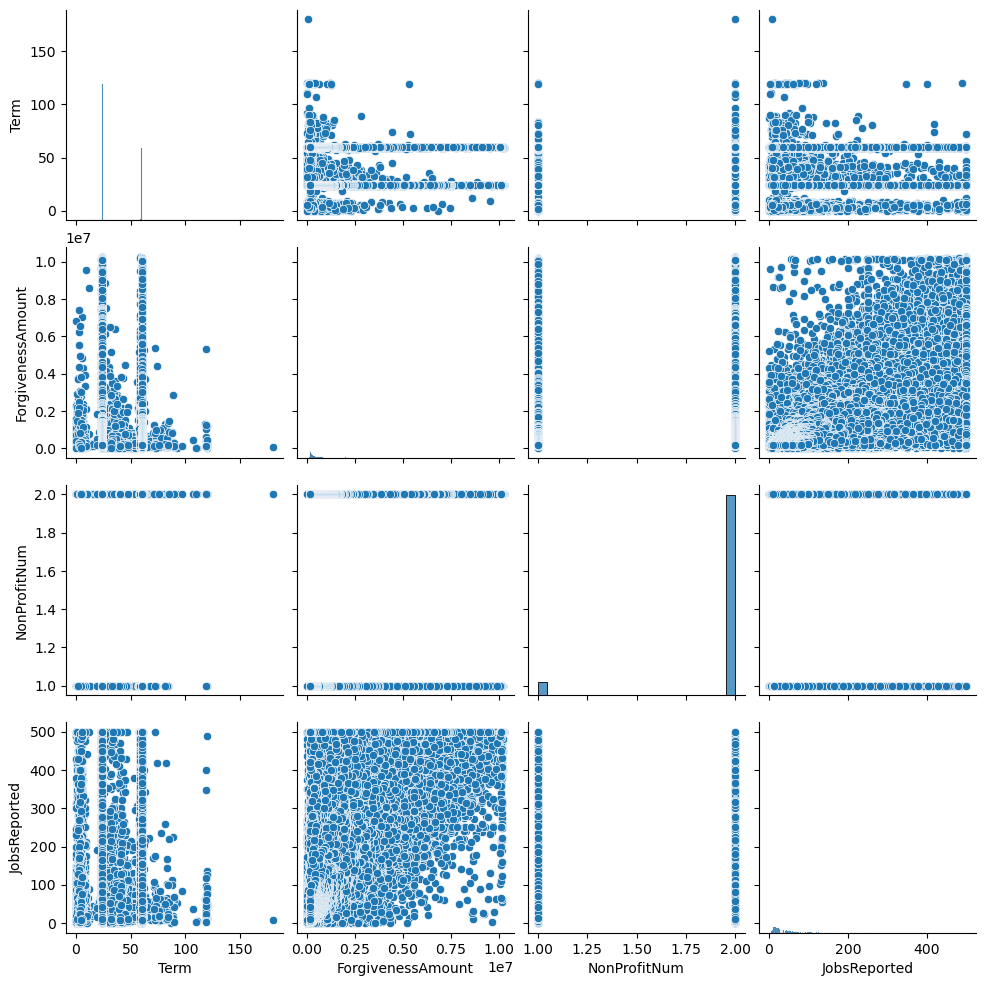

In [52]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Categorical Plots:

##### Creating a categorical variable that splits the "ForgivenessAmount" column into categories

<AxesSubplot:xlabel='ForgivenessAmount', ylabel='Count'>

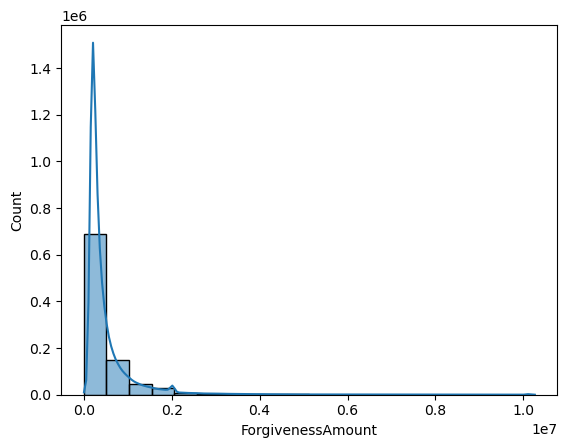

In [53]:
# Use a histogram to visualize the distribution of the variables

sns.histplot(df['ForgivenessAmount'], bins = 20, kde = True)

In [54]:
df['ForgivenessAmount'].describe()

count    9.388720e+05
mean     5.285148e+05
std      7.315045e+05
min      1.000000e-02
25%      2.008463e+05
50%      2.951753e+05
75%      5.399427e+05
max      1.026528e+07
Name: ForgivenessAmount, dtype: float64

In [55]:
df.loc[df['ForgivenessAmount'] < 20000, 'Price category'] = 'Low price'

In [56]:
df.loc[(df['ForgivenessAmount'] >= 20000) & (df['ForgivenessAmount'] < 500000), 'Price category'] = 'Middle price'

In [57]:
df.loc[df['ForgivenessAmount'] >= 500000, 'Price category'] = 'High price'

In [58]:
df['Price category'].value_counts(dropna = False)

Middle price    680378
High price      257968
NaN              29646
Low price          526
Name: Price category, dtype: int64

In [59]:
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatusDate',
       'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'RuralUrbanIndicator', 'BusinessAgeDescription', 'JobsReported',
       'BusinessType', 'OriginatingLenderLocationID', 'OriginatingLender',
       'NonProfit', 'ForgivenessAmount', 'ForgivenessDate', 'LoanStatusNum',
       'RuralUrbanIndicatorNum', 'BusinessAgeDescriptionNum',
       'BusinessTypeNum', 'NonProfitNum', 'Price category'],
      dtype='object')

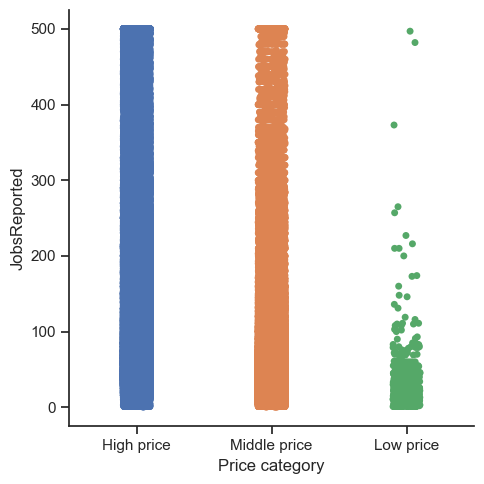

In [60]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Price category", y="JobsReported", hue="Price category", data=df)

In [61]:
# fig = g.get_figure()
g.savefig("splot.png") 

# Image saved in the working directory